<a href="https://colab.research.google.com/github/Anjaszz/Klasifikasi-Penyakit-Daun-Anggur/blob/main/Klasifikasi_penyakit_daun_anggur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Model Klasifikasi penyakit pada daun anggur menggunakan CNN(Convolutional Neural Network)**
**Created by Anjas rani**

https://anjasrani.my.id

# **Ekstraksi Dataset Anggur dari File ZIP**
Pada code dibawah ini, kita mengekstrak dataset anggur yang disimpan dalam file ZIP. Proses ini memungkinkan kita untuk mengakses gambar-gambar daun anggur yang akan digunakan untuk melatih model klasifikasi. Setelah diekstrak, kita juga akan memeriksa struktur direktori dari dataset yang diambil.


In [3]:
import zipfile, os
local_zip = '/tmp/grape-data.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/grape-data'
os.listdir(base_dir)


['BlackMeasles', 'HealthyGrapes', 'LeafBlight', 'BlackRot']

# **Mengatur Data dan Preprocessing untuk Klasifikasi Gambar Menggunakan CNN**
Kode ini mempersiapkan dataset gambar untuk pelatihan model Convolutional Neural Network (CNN). Menggunakan ImageDataGenerator, gambar dinormalisasi dan dibagi menjadi data pelatihan dan validasi. Metode flow_from_directory memuat gambar dari folder berdasarkan kelas, dengan ukuran gambar ditetapkan ke 150x150 piksel.

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

BATCH_SIZE = 32
IMG_HEIGHT = 150
IMG_WIDTH = 150
SHUFFLE_BUFFER_SIZE = 1000
PREFETCH_BUFFER_SIZE = tf.data.AUTOTUNE

# Buat dataset pelatihan
train_dataset = image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset='training',
    seed=7,  # Untuk konsistensi pengacakan
    image_size=(150,150),
    label_mode='categorical',
    batch_size=BATCH_SIZE
)

# Buat dataset validasi
validation_dataset = image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset='validation',
    seed=7,  # Untuk konsistensi pengacakan
    image_size=(150,150),
    label_mode='categorical',
    batch_size=BATCH_SIZE
)

Found 1600 files belonging to 4 classes.
Using 1280 files for training.
Found 1600 files belonging to 4 classes.
Using 320 files for validation.


In [5]:
# Terapkan caching, pengacakan, dan prefetching pada dataset pelatihan
train_data = (
    train_dataset
    .cache()
    .shuffle(SHUFFLE_BUFFER_SIZE)
    .prefetch(PREFETCH_BUFFER_SIZE)
)

# Terapkan caching dan prefetching pada dataset validasi
validation_data = (
    validation_dataset
    .cache()
    .prefetch(PREFETCH_BUFFER_SIZE)
)

# **Pembangunan Model Convolutional Neural Network (CNN)**
Kode dibawah ini membangun model CNN untuk klasifikasi gambar. Model terdiri dari beberapa lapisan konvolusi (Conv2D) dan lapisan pengambilan sampel maksimum (MaxPooling2D) untuk mengekstraksi fitur dari gambar. Setelah lapisan konvolusi, gambar diratakan dengan Flatten() sebelum masuk ke lapisan dense (Dense) yang memiliki 128 neuron dan fungsi aktivasi ReLU. Dropout ditambahkan untuk mencegah overfitting. Lapisan output memiliki 4 neuron (untuk 4 kelas) dan menggunakan fungsi aktivasi softmax. Model kemudian dikompilasi menggunakan optimizer Adam dan loss categorical crossentropy.

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = Sequential()


model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,063,620 (4.06 MB)

 Trainable params: 1,063,620 (4.06 MB)

 Non-trainable params: 0 (0.00 B)

# **Melatih Model**
Kode ini untuk melatih model menggunakan data pelatihan dan validasi. EarlyStopping digunakan untuk menghentikan pelatihan jika tidak ada perbaikan pada nilai val_loss selama 5 epoch berturut-turut, mencegah overfitting. Model dilatih selama 20 epoch dengan langkah per epoch ditetapkan ke 32 dan langkah validasi ke 8. Hasil dari pelatihan disimpan dalam variabel history, yang dapat digunakan untuk menganalisis performa model selama pelatihan.

In [8]:
num_train_samples = len(train_dataset) * BATCH_SIZE  # Hitung total sample di train dataset
steps_per_epoch = num_train_samples // BATCH_SIZE

print(steps_per_epoch)

40


In [9]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)


history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=20,
    verbose=1,
    validation_steps=8,

    callbacks=[early_stopping]
)


Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 107s 3s/step - accuracy: 0.2965 - loss: 11.6205 - val_accuracy: 0.6172 - val_loss: 0.8915
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5691 - loss: 1.0177

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


40/40 ━━━━━━━━━━━━━━━━━━━━ 135s 3s/step - accuracy: 0.5699 - loss: 1.0165 - val_accuracy: 0.7969 - val_loss: 0.4960
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 111s 3s/step - accuracy: 0.7095 - loss: 0.7217 - val_accuracy: 0.7227 - val_loss: 0.6594
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 138s 3s/step - accuracy: 0.7549 - loss: 0.6419 - val_accuracy: 0.8594 - val_loss: 0.3221
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 105s 3s/step - accuracy: 0.7958 - loss: 0.5561 - val_accuracy: 0.8047 - val_loss: 0.4752
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.7968 - loss: 0.5480 - val_accuracy: 0.8906 - val_loss: 0.2896
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 112s 3s/step - accuracy: 0.8394 - loss: 0.4043 - val_accuracy: 0.8945 - val_loss: 0.2777
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.8824 - loss: 0.3314 - val_accuracy: 0.8750 - val_loss: 0.3380
Epoch 9/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 105s 3s/step - accuracy: 0.8954 - loss: 0.2592 - val_accuracy: 0.8945 - val_loss: 0.

# **Visualisasi Akurasi dan Kerugian Model**
memvisualisasikan kinerja model selama pelatihan. Pertama, grafik akurasi model ditampilkan dengan memplot akurasi data latih dan validasi berdasarkan epoch. Ini membantu untuk melihat apakah model belajar dengan baik. Kedua, grafik kerugian (loss) model juga ditampilkan dengan memplot kerugian untuk data latih dan validasi. Grafik ini berguna untuk menganalisis apakah model mengalami overfitting atau underfitting. Kedua grafik ditampilkan menggunakan library Matplotlib, memberikan wawasan visual tentang performa model selama proses pelatihan.

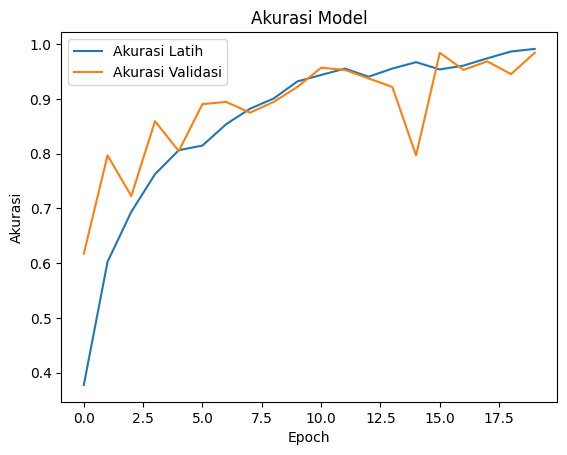

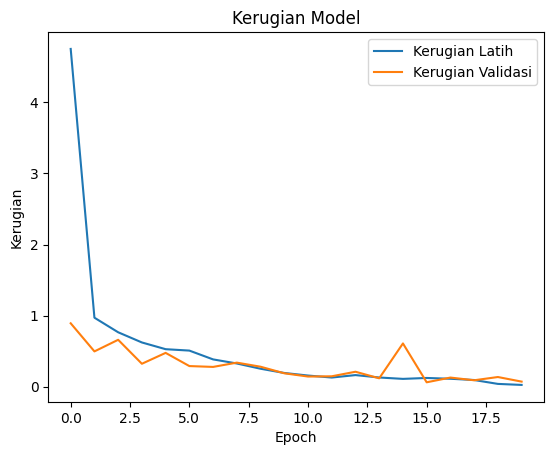

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Akurasi Latih')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Akurasi Model')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Kerugian Latih')
plt.plot(history.history['val_loss'], label='Kerugian Validasi')
plt.title('Kerugian Model')
plt.ylabel('Kerugian')
plt.xlabel('Epoch')
plt.legend()
plt.show()


# **Analisis Prediksi Menggunakan confusion matrix dan Laporan Klasifikasi**
 untuk mengevaluasi performa model dengan menghasilkan matriks kebingungan dan laporan klasifikasi. Matriks kebingungan menunjukkan jumlah prediksi yang benar dan salah untuk setiap kelas, sedangkan laporan klasifikasi memberikan metrik seperti precision, recall, dan f1-score untuk menilai akurasi model dalam mengklasifikasikan data validasi.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step


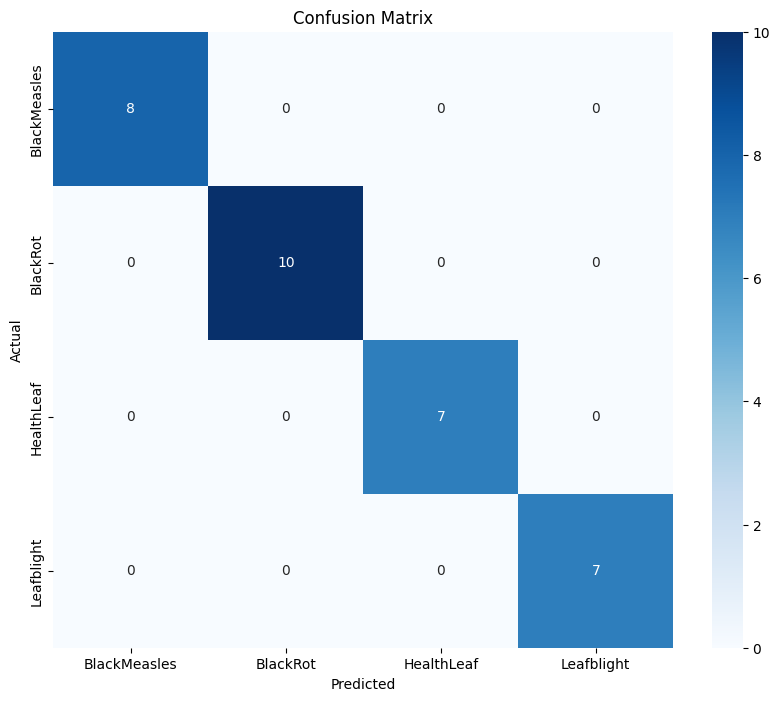

              precision    recall  f1-score   support

BlackMeasles       1.00      1.00      1.00         8
    BlackRot       1.00      1.00      1.00        10
  HealthLeaf       1.00      1.00      1.00         7
  Leafblight       1.00      1.00      1.00         7

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



In [14]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
class_names = ['BlackMeasles','BlackRot','HealthLeaf', 'Leafblight']

for val_images, val_labels in validation_data.take(1):
    predictions = model.predict(val_images)
    predicted_classes = np.argmax(predictions, axis=1)

    cm = confusion_matrix(np.argmax(val_labels, axis=1), predicted_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

    print(classification_report(np.argmax(val_labels, axis=1), predicted_classes, target_names=class_names))


# **Prediksi Gambar**

Saving GrapeBlackRot(8).jfif to GrapeBlackRot(8).jfif


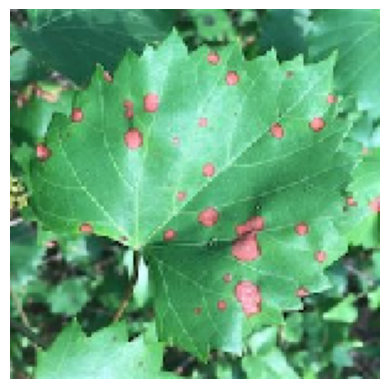

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Prediksi: BlackRot dengan probabilitas: 1.00
Gambar: GrapeBlackRot(8).jfif


In [22]:

from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

    path = fn
    img = image.load_img(path, target_size=(150, 150))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    classes = model.predict(x)

    predicted_class = np.argmax(classes[0])

    print(f'Prediksi: {class_names[predicted_class]} dengan probabilitas: {classes[0][predicted_class]:.2f}')
    print(f'Gambar: {fn}')

